In [65]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
file_path = "../data/raw/bc_surgical_wait_times_quarterly_2009_2025.xlsx"
pd.read_excel(file_path)

,FISCAL_YEAR,QUARTER,HEALTH_AUTHORITY,HOSPITAL_NAME,PROCEDURE_GROUP,WAITING,COMPLETED,PERCENTILE_COMP_50TH,PERCENTILE_COMP_90TH
0,2009/10,Q1,All Health Authorities,All Facilities,Abdominoplasty,65,21,8.1,73.4
1,2009/10,Q1,All Health Authorities,All Facilities,All Other Procedures,1552,1860,4.0,15.9
2,2009/10,Q1,All Health Authorities,All Facilities,All Procedures,69587,58928,5.0,24.6
3,2009/10,Q1,All Health Authorities,All Facilities,Aortic Aneurysm Repair,67,98,4.3,12.4
4,2009/10,Q1,All Health Authorities,All Facilities,Appendectomy,11,27,3.9,9.5
...,...,...,...,...,...,...,...,...,...
202948,2022/23,Q4,Northern,Fort St. John General Hospital,Myringotomy,0,<5,NaN,NaN
202949,2018/19,Q4,Interior,All Facilities,Gastrostomy/Jejunostomy,0,<5,NaN,NaN
202950,2024/25,Q4,Northern,All Facilities,Free Flap Graft,0,<5,NaN,NaN
202951,2019/20,Q2,Vancouver Island,Saanich Peninsula Hospital,Appendectomy,0,<5,NaN,NaN


In [51]:
df =pd.read_excel(file_path, engine='openpyxl')

In [52]:
df.shape

(202953, 9)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202953 entries, 0 to 202952
Data columns (total 9 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   FISCAL_YEAR           202953 non-null  object 
 1   QUARTER               202953 non-null  object 
 2   HEALTH_AUTHORITY      202953 non-null  object 
 3   HOSPITAL_NAME         202953 non-null  object 
 4   PROCEDURE_GROUP       202953 non-null  object 
 5   WAITING               202953 non-null  object 
 6   COMPLETED             202953 non-null  object 
 7   PERCENTILE_COMP_50TH  129180 non-null  float64
 8   PERCENTILE_COMP_90TH  129180 non-null  float64
dtypes: float64(2), object(7)
memory usage: 13.9+ MB


In [54]:
df.shape


(202953, 9)

In [55]:
df.columns

Index(['FISCAL_YEAR', 'QUARTER', 'HEALTH_AUTHORITY', 'HOSPITAL_NAME',
       'PROCEDURE_GROUP', 'WAITING', 'COMPLETED', 'PERCENTILE_COMP_50TH',
       'PERCENTILE_COMP_90TH'],
      dtype='object')

In [131]:
proc = "Skin Tumour Removal"
df_proc = df[df['PROCEDURE_GROUP'] == proc]

In [132]:
df_proc['PROCEDURE_GROUP'].unique()

array(['Skin Tumour Removal'], dtype=object)

In [133]:
df_proc[['WAITING', 'COMPLETED']].dtypes

WAITING      object
COMPLETED    object
dtype: object

In [135]:
df_proc = df_proc.copy()


In [136]:
df_proc['WAITING'] = pd.to_numeric(df_proc['WAITING'], errors='coerce')
df_proc['COMPLETED'] = pd.to_numeric(df_proc['COMPLETED'], errors='coerce')

In [137]:
df_proc[['WAITING', 'COMPLETED']].dtypes

WAITING      float64
COMPLETED    float64
dtype: object

In [138]:
df_proc[['WAITING', 'COMPLETED']].isna().sum()

WAITING      942
COMPLETED    928
dtype: int64

In [139]:
df_proc2 = df_proc.copy()

In [140]:
df_proc2.shape

(3927, 9)

In [141]:
agg = df_proc2.groupby(['FISCAL_YEAR', 'QUARTER'])[['WAITING', 'COMPLETED']].sum()

In [142]:
agg.head()

WAITING  COMPLETED
FISCAL_YEAR QUARTER                    
2009/10     Q1        2141.0     2436.0
            Q2        2327.0     1994.0
            Q3        2035.0     2335.0
            Q4        2039.0     1778.0
2010/11     Q1        2026.0     2068.0

In [143]:
agg_plot = agg.reset_index()

In [144]:
agg_plot.head()

,FISCAL_YEAR,QUARTER,WAITING,COMPLETED
0,2009/10,Q1,2141.0,2436.0
1,2009/10,Q2,2327.0,1994.0
2,2009/10,Q3,2035.0,2335.0
3,2009/10,Q4,2039.0,1778.0
4,2010/11,Q1,2026.0,2068.0


In [145]:
agg_plot['time'] = agg_plot['FISCAL_YEAR'].astype(str) + "-" + agg_plot['QUARTER']

In [146]:
agg_plot[['FISCAL_YEAR','QUARTER','time']].head()

,FISCAL_YEAR,QUARTER,time
0,2009/10,Q1,2009/10-Q1
1,2009/10,Q2,2009/10-Q2
2,2009/10,Q3,2009/10-Q3
3,2009/10,Q4,2009/10-Q4
4,2010/11,Q1,2010/11-Q1


In [147]:
agg_plot['procedure'] = 'Skin Tumour Removal'
agg_plot_skin = agg_plot.copy()

In [148]:
agg_plot_skin[['procedure','time','WAITING','COMPLETED']].head()

,procedure,time,WAITING,COMPLETED
0,Skin Tumour Removal,2009/10-Q1,2141.0,2436.0
1,Skin Tumour Removal,2009/10-Q2,2327.0,1994.0
2,Skin Tumour Removal,2009/10-Q3,2035.0,2335.0
3,Skin Tumour Removal,2009/10-Q4,2039.0,1778.0
4,Skin Tumour Removal,2010/11-Q1,2026.0,2068.0


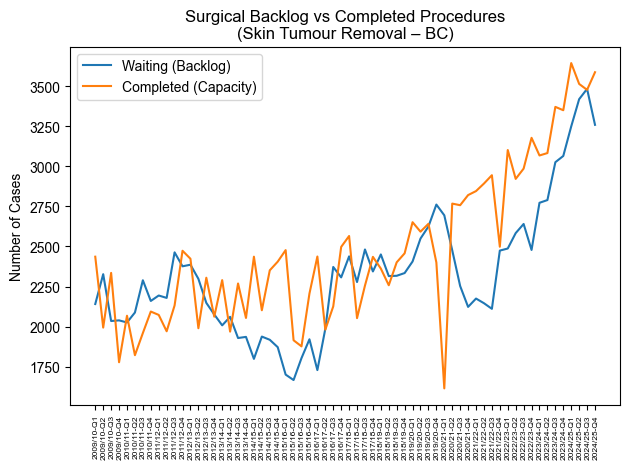

In [149]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure()
plt.title(
    'Surgical Backlog vs Completed Procedures\n(Skin Tumour Removal – BC)',
    fontsize=12
)
plt.ylabel('Number of Cases')

plt.plot(agg_plot_skin['WAITING'], label='Waiting (Backlog)')
plt.plot(agg_plot_skin['COMPLETED'], label='Completed (Capacity)')

plt.xticks(
    ticks=range(0, len(agg_plot_skin)),
    labels=agg_plot_skin['time'],
    rotation=90,
    fontsize=6
)

plt.legend()
plt.tight_layout()
plt.show()

In [150]:
proc = "Hernia Repair - Abdominal"
df_proc = df[df['PROCEDURE_GROUP'] == proc]

In [151]:
df_proc['PROCEDURE_GROUP'].unique()

array(['Hernia Repair - Abdominal'], dtype=object)

In [152]:
df_proc[['WAITING', 'COMPLETED']].dtypes

WAITING      object
COMPLETED    object
dtype: object

In [153]:
df_proc = df_proc.copy()

In [154]:
df_proc['WAITING'] = pd.to_numeric(df_proc['WAITING'], errors='coerce')
df_proc['COMPLETED'] = pd.to_numeric(df_proc['COMPLETED'], errors='coerce')

In [155]:
df_proc[['WAITING', 'COMPLETED']].dtypes

WAITING      float64
COMPLETED    float64
dtype: object

In [156]:
df_proc[['WAITING', 'COMPLETED']].isna().sum()

WAITING      285
COMPLETED    191
dtype: int64

In [157]:
df_proc2 = df_proc.copy()

In [158]:
df_proc2.shape

(3810, 9)

In [159]:
agg = df_proc2.groupby(['FISCAL_YEAR', 'QUARTER'])[['WAITING', 'COMPLETED']].sum()

In [160]:
agg.head()

WAITING  COMPLETED
FISCAL_YEAR QUARTER                    
2009/10     Q1       10271.0     8532.0
            Q2       11455.0     6577.0
            Q3       12147.0     8117.0
            Q4       12297.0     8170.0
2010/11     Q1       12569.0     8441.0

In [161]:
agg_plot = agg.reset_index()

In [162]:
agg_plot.head()

,FISCAL_YEAR,QUARTER,WAITING,COMPLETED
0,2009/10,Q1,10271.0,8532.0
1,2009/10,Q2,11455.0,6577.0
2,2009/10,Q3,12147.0,8117.0
3,2009/10,Q4,12297.0,8170.0
4,2010/11,Q1,12569.0,8441.0


In [163]:
agg_plot['time'] = agg_plot['FISCAL_YEAR'].astype(str) + "-" + agg_plot['QUARTER']

In [164]:
agg_plot[['FISCAL_YEAR','QUARTER','time']].head()

,FISCAL_YEAR,QUARTER,time
0,2009/10,Q1,2009/10-Q1
1,2009/10,Q2,2009/10-Q2
2,2009/10,Q3,2009/10-Q3
3,2009/10,Q4,2009/10-Q4
4,2010/11,Q1,2010/11-Q1


In [165]:
agg_plot['procedure'] = 'Hernia Repair - Abdominal'
agg_plot_hernia = agg_plot.copy()

In [166]:
agg_plot_hernia[['procedure','time','WAITING','COMPLETED']].head()

,procedure,time,WAITING,COMPLETED
0,Hernia Repair - Abdominal,2009/10-Q1,10271.0,8532.0
1,Hernia Repair - Abdominal,2009/10-Q2,11455.0,6577.0
2,Hernia Repair - Abdominal,2009/10-Q3,12147.0,8117.0
3,Hernia Repair - Abdominal,2009/10-Q4,12297.0,8170.0
4,Hernia Repair - Abdominal,2010/11-Q1,12569.0,8441.0


In [167]:
agg_plot_skin['pressure'] = agg_plot_skin['WAITING'] / agg_plot_skin['COMPLETED']
agg_plot_hernia['pressure'] = agg_plot_hernia['WAITING'] / agg_plot_hernia['COMPLETED']

In [170]:
agg_plot_skin['pressure'].head()


0    0.878900
1    1.167001
2    0.871520
3    1.146794
4    0.979691
Name: pressure, dtype: float64

In [171]:
agg_plot_hernia['pressure'].head()

0    1.203821
1    1.741676
2    1.496489
3    1.505141
4    1.489042
Name: pressure, dtype: float64

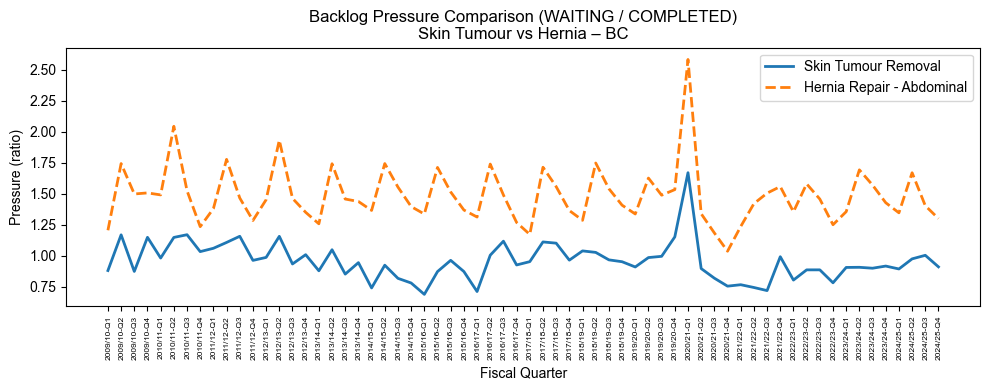

In [172]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Arial'

plt.figure(figsize=(10, 4))
plt.title(
    'Backlog Pressure Comparison (WAITING / COMPLETED)\nSkin Tumour vs Hernia – BC',
    fontsize=12
)
plt.ylabel('Pressure (ratio)')
plt.xlabel('Fiscal Quarter')

# Skin
plt.plot(
    agg_plot_skin['pressure'],
    label='Skin Tumour Removal',
    linewidth=2
)

# Hernia
plt.plot(
    agg_plot_hernia['pressure'],
    label='Hernia Repair - Abdominal',
    linewidth=2,
    linestyle='--'
)

plt.xticks(
    ticks=range(0, len(agg_plot_skin)),
    labels=agg_plot_skin['time'],
    rotation=90,
    fontsize=6
)

plt.legend()
plt.tight_layout()
plt.show()